In [56]:
!pip install openpyxl

In [70]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 9.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 9.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 10.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.6 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.3 MB/s eta 0:00:00


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
np.random.seed(1)
n=100
dates=pd.date_range(start='2025-01-25',periods=n,freq='D')
products=np.random.choice(['Tablet','Camera','Phone','Microphone','Keyboard'],n)
prices=np.round(np.random.uniform(50.0,200.0,n),2)
quatities=np.random.randint(1,15,n)

data= {
    'Date':dates,
    'Products':products,
    'Price': prices,
    'Quantities':quatities
}

df=pd.DataFrame(data)
df.head()

,Date,Products,Price,Quantities
0,2025-01-25,Microphone,147.16,7
1,2025-01-26,Keyboard,103.09,10
2,2025-01-27,Tablet,164.48,7
3,2025-01-28,Camera,103.48,1
4,2025-01-29,Microphone,162.92,1


In [59]:
df.dtypes

Date          datetime64[ns]
Products              object
Price                float64
Quantities             int32
dtype: object

In [60]:
df.to_csv('random_sales.csv',index=False)

In [61]:
df=pd.read_csv('random_sales.csv',parse_dates=['Date'])
df.head()

,Date,Products,Price,Quantities
0,2025-01-25,Microphone,147.16,7
1,2025-01-26,Keyboard,103.09,10
2,2025-01-27,Tablet,164.48,7
3,2025-01-28,Camera,103.48,1
4,2025-01-29,Microphone,162.92,1


In [62]:
df.dtypes

Date          datetime64[ns]
Products              object
Price                float64
Quantities             int64
dtype: object

In [63]:
df.to_excel('sales_data.xlsx')

In [64]:
df.to_json('sales_data.json')

In [65]:
df.shape

(100, 4)

In [66]:
df.describe().round(2)

,Date,Price,Quantities
count,100,100.00,100.00
mean,2025-03-15 12:00:00,117.32,7.79
min,2025-01-25 00:00:00,51.35,1.00
25%,2025-02-18 18:00:00,81.13,5.00
50%,2025-03-15 12:00:00,114.10,8.00
75%,2025-04-09 06:00:00,161.21,11.25
max,2025-05-04 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [67]:
df.values[:5]

array([[Timestamp('2025-01-25 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2025-01-26 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2025-01-27 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2025-01-28 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2025-01-29 00:00:00'), 'Microphone', 162.92, 1]],
      dtype=object)

In [73]:
products_sales=df.groupby('Products')['Quantities'].sum()
products_sales

Products
Camera        186
Keyboard      173
Microphone    106
Phone         124
Tablet        190
Name: Quantities, dtype: int64

In [81]:
avarage_prices=df.groupby('Products')['Price'].mean().round(2)

<function matplotlib.pyplot.show(close=None, block=None)>

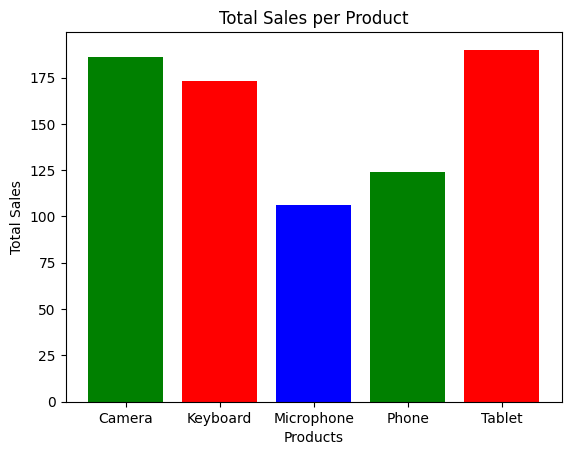

In [80]:
plt.bar(products_sales.index,products_sales.values,color=['green','red','blue'])
plt.title('Total Sales per Product')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

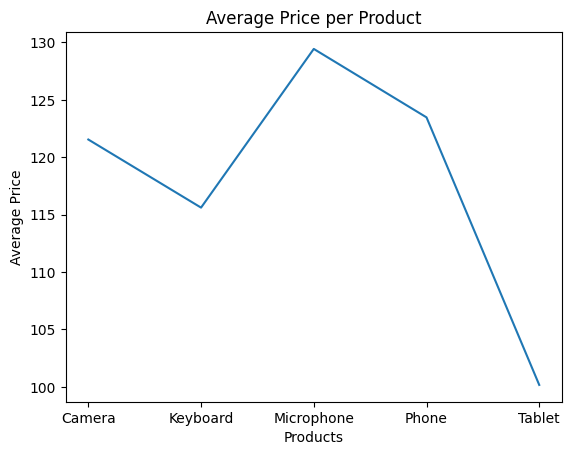

In [83]:
plt.plot(avarage_prices.index,avarage_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Products')
plt.ylabel('Average Price')
plt.show